In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 羅吉斯迴歸 Logistic Regression
 y 為二元變數機率為p, (1-p)

In [1]:
import pandas as pd

In [111]:
file ="D:\\Learning Note\\Python\\pythoncode\\Practice\\data\\titanic.csv"
df = pd.read_csv(file, sep=",", comment="#")

X = df[["pclass","age","sex"]].values
y = df["survived"].values

   row.names pclass  survived  \
0          1    1st         1   
1          2    1st         0   
2          3    1st         0   
3          4    1st         0   
4          5    1st         1   

                                              name      age     embarked  \
0                     Allen, Miss Elisabeth Walton  29.0000  Southampton   
1                      Allison, Miss Helen Loraine   2.0000  Southampton   
2              Allison, Mr Hudson Joshua Creighton  30.0000  Southampton   
3  Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)  25.0000  Southampton   
4                    Allison, Master Hudson Trevor   0.9167  Southampton   

                         home.dest room      ticket   boat     sex  
0                     St Louis, MO  B-5  24160 L221      2  female  
1  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  
2  Montreal, PQ / Chesterville, ON  C26         NaN  (135)    male  
3  Montreal, PQ / Chesterville, ON  C26         NaN    NaN  female  

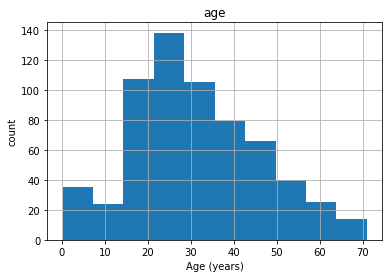

In [112]:
print(df.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(df[["age"]])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()

In [113]:
dff = df[["age"]]
dff.fillna(dff.mean())

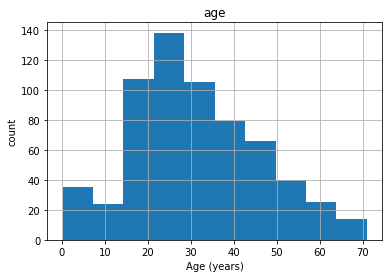

In [115]:
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(dff)
plt.xlabel('After fillna Age (years)')
plt.ylabel('count')
plt.show()

### Pre-processing
age = NA 要用 mean補足值
sex = 1:male, 0:female
class = 1,2,3

In [93]:
ages

array(['29.0000', ' 2.0000', '30.0000', ..., 'NA', 'NA', 'NA'], dtype=object)

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [116]:
#ages

ages = df[["age"]].fillna( df[["age"]].mean())
for row in range(len(ages.values)):
    X[row,1]= ages.values[row,0]

#gender
enc = LabelEncoder()
label_encoder = enc.fit(X[:, 2])
integer_sex = label_encoder.transform(label_encoder.classes_)
gender = label_encoder.transform(X[:,2])
X[:,2] = gender

In [117]:
#class
enc = LabelEncoder()
label_encoder = enc.fit(X[:, 0])
integer_class = label_encoder.transform(label_encoder.classes_)
cls = label_encoder.transform(X[:,0])
X[:,0] = cls

In [118]:
X[:,1]

array([29.0, 2.0, 30.0, ..., 31.19418104265403, 31.19418104265403,
       31.19418104265403], dtype=object)

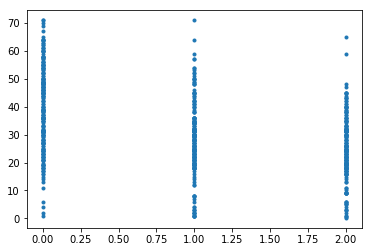

In [119]:
plt.scatter(X[:,0], X[:,1], marker = ".")

### Split Train and Test data

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=33)

### Model Traning

In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [127]:
y_pred = lr.predict(X_test)

In [128]:
lr.predict_proba(X_test[0,:])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.74007217,  0.25992783]])

### Evaluation
classificaton evaluation methods:

1. accurcy : 正確率 
2. recall : 覆蓋率
3. precision : 命中率...etc


In [140]:
from IPython.display import Image
Image(url="https://docs.microsoft.com/zh-tw/azure/machine-learning/media/machine-learning-evaluate-model-performance/6a.png", width=400, height=400)

* Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

In [135]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.829268292683
0.784194528875


* Metric functions: The metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

In [139]:
from sklearn import metrics

In [158]:
#與Ir.score是一樣的都是accuracy_score
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
fpr, tpr, threshold =metrics.roc_curve(y_test,y_pred)
print(fpr)

0.784194528875
[[186  55]
 [ 16  72]]
[ 0.          0.07920792  1.        ]


* Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

In [153]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold croos validation iterator of k=5 folds
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv, scoring = "accuracy")
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))

In [154]:
evaluate_cross_validation(lr, X, y, 5) # need some time!

[ 0.8365019   0.79847909  0.81749049  0.85496183  0.79389313]
Mean score: 0.820 (+/-0.012)


### Prediction
放入要預測的人資料,回應是否survived

In [131]:
X_new = np.array([[3,22,0],[1,30,0]])
feature = ["class","age","sex"]
name = ["李奧","凱特溫絲"]

In [132]:
Z = pd.DataFrame(X_new, columns= feature, index = name)

In [133]:
Z["survived"]=lr.predict(X_new)

In [134]:
Z

,class,age,sex,survived
李奧,3,22,0,0
凱特溫絲,1,30,0,1
